# Predicting Heart Disease



## 1. Problem Definition

Given clinical parameters on patients can we predict whether or not they have heart disease or are at risk of heart disease?

## 2. Data

Data taken from kaggle.com, orignally Cleavland Data from the UCI Machine Learning Repository.


## 3. Evaluation

What do we need to accomplish with the model to proceed further?

Let say that if we can reach 95 % accuracy at predicting heart disease during proof of concept then we will proceed.

## 4. Features

**Data Dictionary**

* age
* sex 0 is female, male is 1
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 or 0

## Preparing the tools

pandas, Matplotlib and Numpy

In [1]:
# import exploratory data analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve




## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## EDA

Explore data and be a subject matter expert on the data you are working with.
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types (numerical, categories)
3. What is missing and how to deal with it?
4. Where are the outliers, should we call about them?
5. How can you add change or remove features to get more out of your data (ie., highly correlated features can be removed)

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

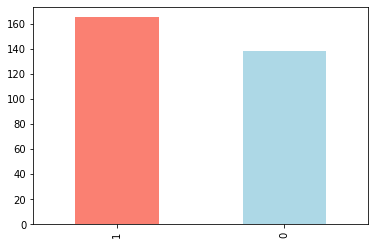

In [5]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
# interesting observation above: almost two thirds of women in the dataset have heart disease.
# around 62 % of people have heart disease, so this is a baseline.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

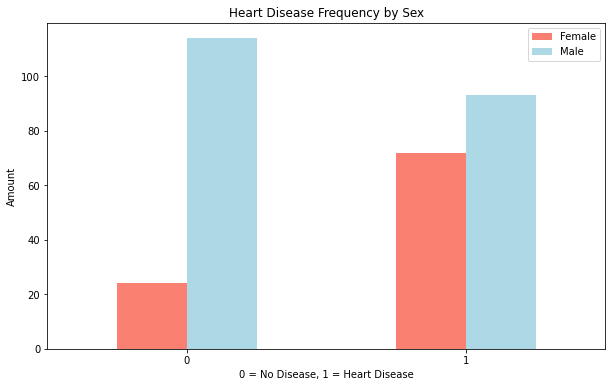

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0) # rotate labels on x ticks

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# 91 different counts so a scatter graph is more appropriate than a bar.
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heartrate for Heart Disease

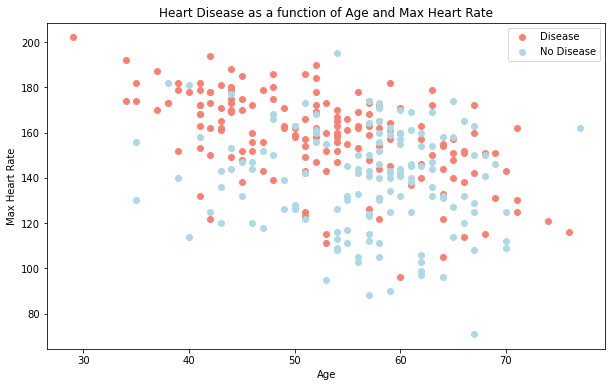

In [15]:
# create another figure
plt.figure(figsize=(10, 6))

# scatter with positive examples (ie with heart disease)
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")

# scatter with negative examples (no heart disease)
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue")

plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [16]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<AxesSubplot:ylabel='Frequency'>

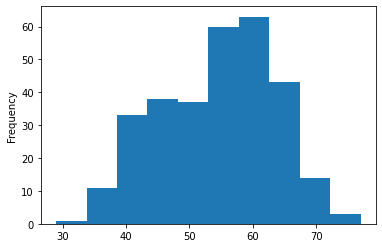

In [17]:
# Check the distribution of the age column with a histogram

df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type (0, 1, 2, 3)


In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

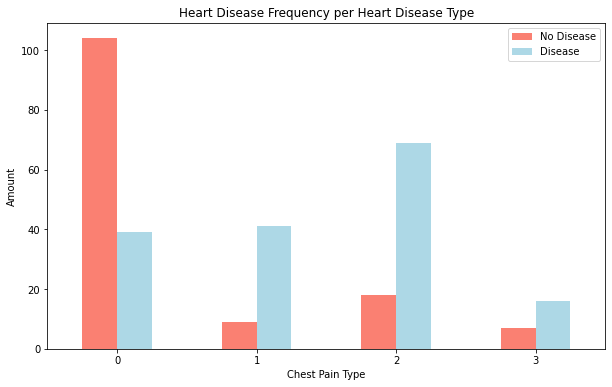

In [19]:
 # Make crosstab visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Heart Disease Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Building a corrolation matrix

In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


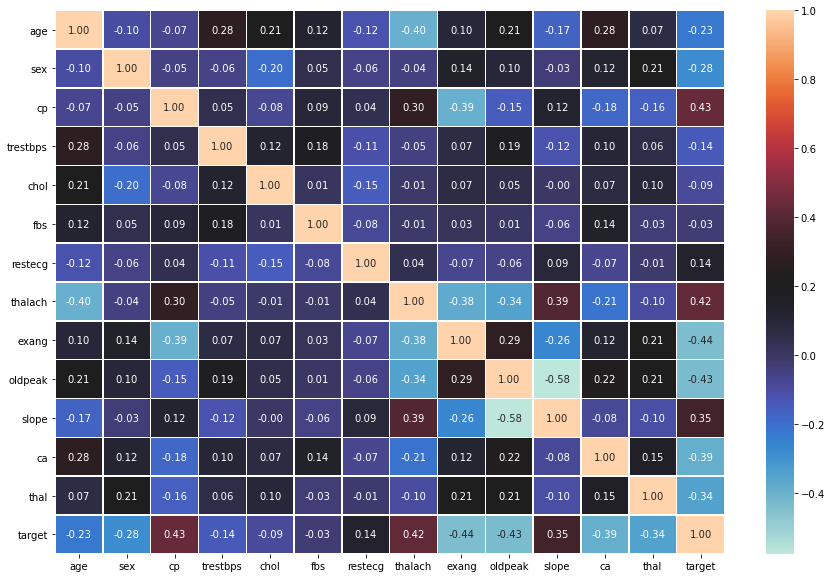

In [21]:
# Make a correlation matrix more readable
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f",
                cmap="icefire")

## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# spilt data

X = df.drop('target', axis=1)
y = df['target']

In [24]:
# split in training and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Lets try 3 different classifiers (we tried linear SVC previously, lets try to improve).
1. K-nearest neighbors
2. RandomForestClassifier
3. Logistic Regression (a linear model for classification rather than regression).

In [25]:
# put models in dict to create function

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create function to fit and score models

def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of machine learning models
    X_train: training data no labels
    X_test: testing data no labels
    y_train: training labels
    y_test: test labels
    '''
    #set random seed
    np.random.seed(42)
    # make dict to record model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # evaluate model and append scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [26]:
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

 ### Model Comparison

<AxesSubplot:>

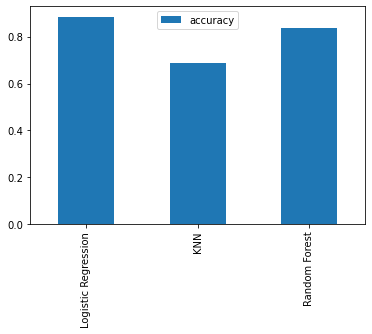

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

 We have baseline models, Linear Regression looks good at 88 % accuracy off the bat. Time to improve to get up over 95 %.
 
 Experimental Phase with a classification model:
 1. Hyperperameter Tuning
 2. Feature Importance
 3. Confusion Matrix
 4. Cross Validation
 5. Precision
 6. Recall
 7. F1 score
 8. Classification Report
 9. ROC Curve
 
 ### Hyperparameter Tuning (by hand first)

In [28]:
# lets tune the K neighbour to see if it can be improved
train_scores = []
test_scores = []

# create a list of different values for n_neigbors
neighbors = range(1, 21)

# set up knn
knn = KNeighborsClassifier()

# loop through different K neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update train scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update test scores list
    test_scores.append(knn.score(X_test, y_test))
    
    

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41 % where n_estimators = 11


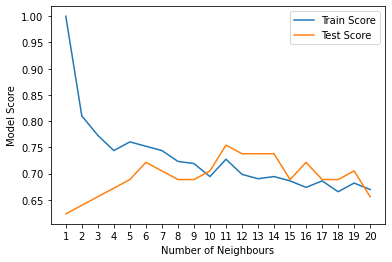

In [37]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(range(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} % where n_estimators = {np.argmax(test_scores)+1}")

In [38]:
# so KNN up from 68 to 75 % but still a way off linear regression and random forest. Drop KNN for now.
 

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
1. Logistic regression 
2. RandomForestClassifer

... using RandomizedSearchCV

In [53]:
# create a hyperparamter grid for logistic regression

log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver": ["liblinear"],
               }

# hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 500, 25),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 10),
          "min_samples_leaf": np.arange(10, 30, 2)}

Tune the models using the RandomizedSearchCV 

In [43]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5, # depending on size of data could consider testing 10, 20.
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

This was the same as the out of the box Logistic regression baseline model. Can consider tweeking the hyperparameters more. 
For now tune the RandomForestClassifier

In [49]:
# Tune Random Forest Classifier
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5, # depending on size of data could consider testing 10, 20.
                               n_iter=100,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [51]:
# Evaluatet the RandomizedSearchCV on the RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

In [52]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [54]:
# Tune Random Forest Classifier_2
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_rf_2 = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5, # depending on size of data could consider testing 10, 20.
                               n_iter=100,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf_2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235, 260, 285, 310,
       335, 360, 385, 410, 435, 460, 485])},
                   verbose=True)

In [55]:
rs_rf_2.best_params_


{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_depth': 10}

In [56]:
rs_rf_2.score(X_test, y_test)

0.8688524590163934

It could be woth adjusting the hyperparameters even more for the RandonForestClassifier. At this point the baseline model for the Logistic Regression is pretty good at 88 %, therefore I will focus on this with a tune using GridSearchCV.

## Hyperparameter Tuning with GridSearchCV

In [62]:
# Hyperparameter grid for logistic regression (remember, this is actually a classification algorithm)

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear", "saga"],
               "penalty":['l1', 'l2', 'elasticnet']}

In [63]:


# Setup grid hyperparameter search for logistic regression using GridSearchCV

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Sh

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shane Rich\Desktop\d

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\linear

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [58]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Take home point: The best model so far is Logisitic Regression and it is not shown on the Scikit Learn model map, which emphasises the importance of doing research to identify a possible model that will work well.

Evaluating the tuned machine learning classifier, beyond accuracy
* ROC Curve and AUC score 
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation as used where possible.

TO make comparision and evaluate the trained model , predictions are made using predict()

In [65]:
y_preds = gs_log_reg.predict(X_test)

In [66]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# Import ROC curve function from sklearn metrics, which was done at the start.

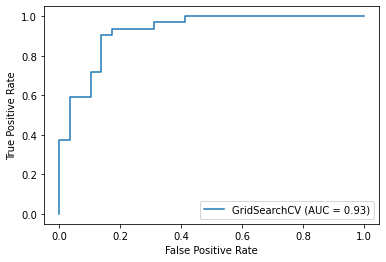

In [68]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [69]:
# Confusion Matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [74]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confustion matrix using Seaborns heatmap.
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

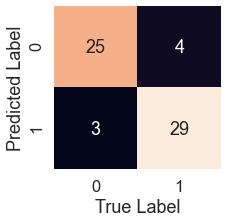

In [75]:
plot_conf_mat(y_test, y_preds)

In [76]:
# Question to consider when deciding the evaluation of a ML model. What is worse, a false positive or a false negative?

<AxesSubplot:>

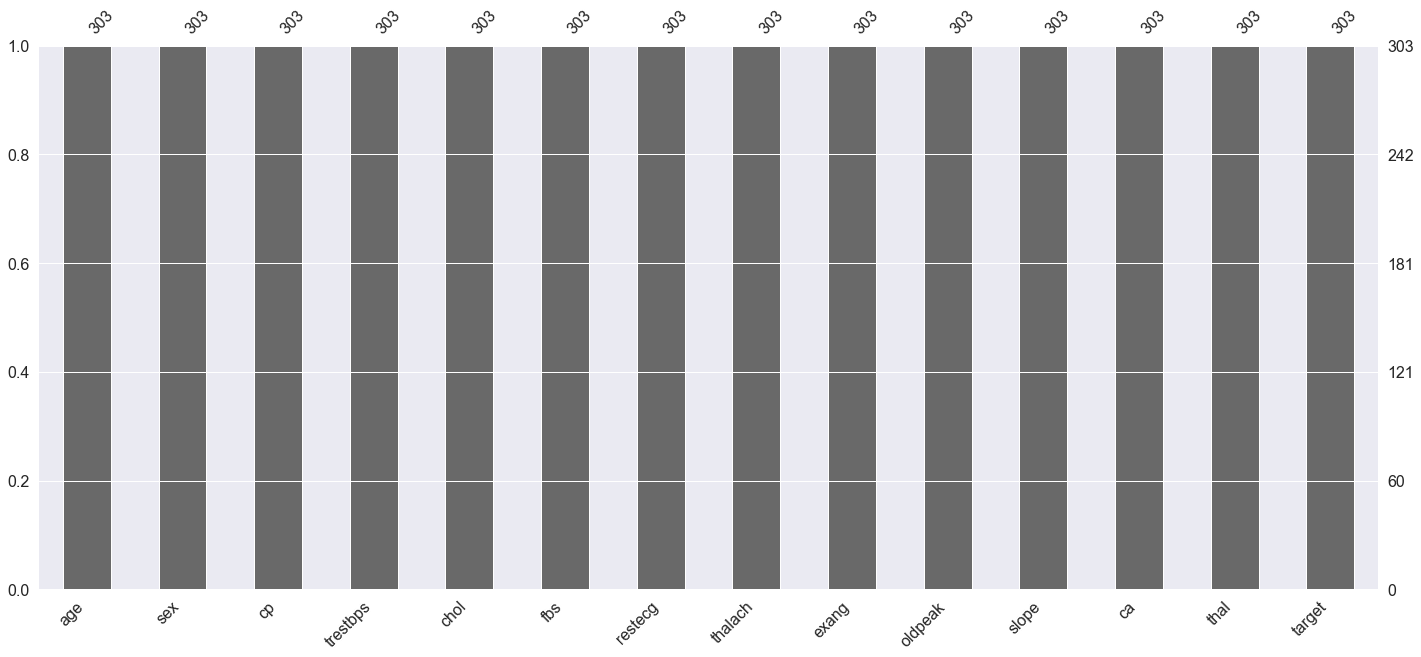

In [77]:
# Handy function for visualising missing data from a dataframe.
import missingno as msno

msno.bar(df)

Time for a classification report as well as a cross validated precision, recall and F1 score.

In [80]:
 print(classification_report(y_test, y_preds))
# now, this report is only on the X_test data set. Need to do a cross validation report.

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using CV
Calculate precision, recall and F1 of the model using cross_val_score

In [81]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [83]:
# create a new classifer with with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                        solver="liblinear",
                        penalty="l2")



In [87]:
# Note, a function could be made for the following to stop repetition.

# Cross Validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8479781420765027

In [88]:
# Cross validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8215873015873015

In [89]:
# Cross validataed recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.9272727272727274

In [90]:
# Cross validated F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8705403543192143

<AxesSubplot:title={'center':'Cross Validated classification metrics'}>

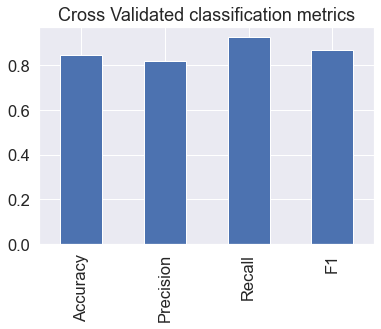

In [107]:
# Visualise our CV metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc.mean(), 
                          "Precision": cv_precision.mean(),
                          "Recall": cv_recall.mean(),
                          "F1": cv_f1.mean()},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross Validated classification metrics",
                     legend=False)



### Feature Importance 

Feature importance is another way of asking which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each ML model. Simply search for <model name> feature importance.

Lets find the feature importance for our logistic regression model.

In [108]:
# Fit an instance of the model with with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                        solver="liblinear",
                        penalty="l2")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [109]:
# Research states that checking the coef_ for a Logistic Regression is one method.
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [112]:
# the coeffficients refer to each feature in the df. They tell the story as to how much they contribute to predicting the target variable, how much they correlate with the target.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
# match coefs of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

<AxesSubplot:title={'center':'Feature Importance'}>

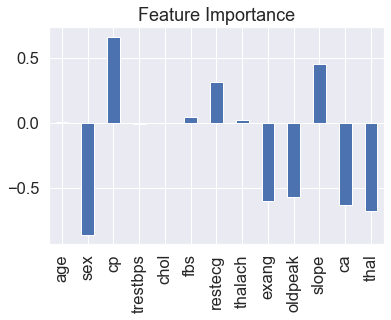

In [119]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature Importance", legend=False)


In [120]:
# looking at a negative coefficient
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [121]:
# looking at a positive coefficient
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Take home points: the coefficients that are around zero may influence the data that is collected in the future, ie not as important as focusing on more data surrounding the features that have a higher coefficient.